<a href="https://colab.research.google.com/github/lilys012/hb_mldl/blob/main/17_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

(train_input, train_target), (test_input, test_tartet) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


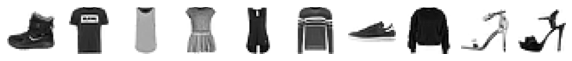

In [2]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
import numpy as np

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [5]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)

In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [7]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6105 - accuracy: 0.7939
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4771 - accuracy: 0.8406
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4555 - accuracy: 0.8475
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4444 - accuracy: 0.8516
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4367 - accuracy: 0.8550


In [8]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4663 - accuracy: 0.8460


[0.4663037061691284, 0.8460000157356262]

18강 : 심층신경망

In [9]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
#sgd = keras.optimizers.SGD()
#model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')
#sgd = keras.optimizers.SGD(leraning_rate=0.1, momentum=0.9, nesterov=True)
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5311 - accuracy: 0.8147
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3999 - accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3545 - accuracy: 0.8716
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3288 - accuracy: 0.8815
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8764


[0.33848854899406433, 0.8764166831970215]

19강 : 신경망 모델 훈련

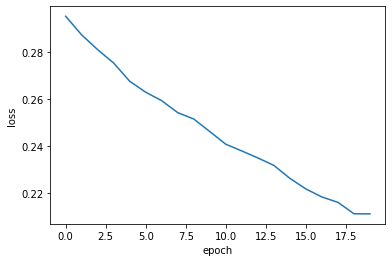

In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [15]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

model.save_weights('model-weights.h5')
model.load_weights('model-weights.h5')
model.save('model-whole.h5')
model = keras.models.load_model('model-whole.h5')
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8794166666666666


In [19]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
model = keras.models.load_model('best-model.h5')

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f3e866fd710>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


In [21]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))
print(early_stopping_cb.stopped_epoch)

0
